In [1]:
from bs4 import BeautifulSoup
from urllib.parse import urljoin, urlparse
import shutil, os, time, datetime, re
import pandas as pd
from PIL import Image
from scraper import DataPreparation, Corpus
from analyzer import Analyzer

# TODO

- carousel finder
- builtwith implementation

# Corpus Creation

In [2]:
cp = Corpus()

In [6]:
#cp.initCorpus()

# Data Preparation

In [4]:
dp = DataPreparation()

In [5]:
#dp.getImages()

In [6]:
data_dict = dp.createAnalyzerDict()

<DirEntry 'hausvonazer.de.html'>
<DirEntry 'houseofsolution.de.html'>
<DirEntry 'INFO.txt'>
<DirEntry 'pierrevogelde.blogspot.com.html'>
<DirEntry 'tabgha.ruhr.html'>
<DirEntry 'www.al-adala.de.html'>
<DirEntry 'www.buddhismus-deutschland.de.html'>
<DirEntry 'www.credo-kirche.de.html'>
<DirEntry 'www.ditib.de.html'>
<DirEntry 'www.ekd.de.html'>
<DirEntry 'www.gebetshaus.org.html'>
<DirEntry 'www.hinduistische-gemeinde-deutschland.de.html'>
<DirEntry 'www.katholisch.de.html'>
<DirEntry 'www.kircheimpott.de.html'>
<DirEntry 'www.miraath.de.html'>
<DirEntry 'www.zentralratderjuden.de.html'>
<DirEntry 'zentralrat.de.html'>
Current netloc hausvonazer.de of type <class 'str'>
Current netloc houseofsolution.de of type <class 'str'>
Current netloc pierrevogelde.blogspot.com of type <class 'str'>
Current netloc tabgha.ruhr of type <class 'str'>
Current netloc al-adala.de of type <class 'str'>
Current netloc buddhismus-deutschland.de of type <class 'str'>
Current netloc credo-kirche.de of type <

In [8]:
data_dict["zentralratderjuden.de"]

{'total_images': 55,
 'big_images': 15,
 'middle_images': 10,
 'small_images': 8,
 'background_images': 10,
 'images': {'https://www.zentralratderjuden.de/fileadmin//user_upload/banner.png': {'width': 1905,
   'height': 490},
  'https://www.zentralratderjuden.de/fileadmin/img/zentralrat-der-juden-logo.jpg': {'width': 290,
   'height': 100},
  'https://www.zentralratderjuden.de/fileadmin/templates/layout/Resources/Public/Images/icon_fb.png': {'width': 10,
   'height': 18},
  'https://www.zentralratderjuden.de/fileadmin/templates/layout/Resources/Public/Images/icon_tw.png': {'width': 18,
   'height': 18},
  'https://www.zentralratderjuden.de/fileadmin/templates/layout/Resources/Public/Images/iconinstagram.png': {'width': 18,
   'height': 18},
  'https://www.zentralratderjuden.de/fileadmin/_processed_/4/c/csm_csm_EGg_ivPWwAENi5b_0238c40db3_53f23979ff.jpg': {'width': 600,
   'height': 337},
  'https://www.zentralratderjuden.de/fileadmin/_processed_/5/f/csm_security-265130_1280_0ade5ad7f0.j

# Analysis

In [2]:
ana = Analyzer()

In [3]:
# Clustering & Standardization

In [6]:
df_orig = ana.data_df

In [19]:
df_orig_clustered = ana.clusterData(df_orig[["big_images", "total_length"]])

In [20]:
df_orig_clustered

,big_images,total_length,clusters
hausvonazer.de,14,875,0
houseofsolution.de,1,4192,0
pierrevogelde.blogspot.com,0,6277,0
tabgha.ruhr,8,2707,0
al-adala.de,0,11270,0
buddhismus-deutschland.de,16,7405,0
credo-kirche.de,0,1848,0
ditib.de,0,4243,0
ekd.de,8,24499,1
gebetshaus.org,3,41724,2


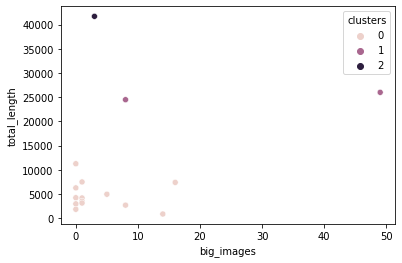

In [21]:
ana.visualizeCluster(df_orig_clustered, "big_images", "total_length")

In [11]:
df_scaled = ana.standardizeData(df_orig)

In [12]:
df_scaled_clustered = ana.clusterData(df_scaled)

In [13]:
df_scaled_clustered

,total_images_scaled,big_images_scaled,middle_images_scaled,small_images_scaled,background_images_scaled,total_length_scaled,external_links_scaled,internal_links_scaled,total_links_scaled,clusters
hausvonazer.de,-0.326248,0.609449,0.417883,-0.741087,-0.383104,-0.791339,-0.438083,-0.801780,-0.846838,0
houseofsolution.de,-0.356076,-0.474016,-0.537278,0.343903,-0.269592,-0.489500,-0.267124,0.248460,0.191975,0
pierrevogelde.blogspot.com,0.389633,-0.557360,0.417883,0.653901,-0.383104,-0.299769,1.186030,0.178444,0.378812,0
tabgha.ruhr,0.329976,0.109388,-0.728310,0.188905,-0.383104,-0.624632,-0.438083,-0.786221,-0.831891,0
al-adala.de,-0.475390,-0.557360,1.564075,-0.663588,-0.383104,0.154582,-0.694522,2.061096,1.858559,0
buddhismus-deutschland.de,-0.296420,0.776136,-0.728310,-0.741087,-0.383104,-0.197124,-0.908221,-0.755103,-0.884205,0
credo-kirche.de,-0.743845,-0.557360,-0.728310,-0.353591,-0.269592,-0.702799,-0.694522,-0.887356,-0.973887,0
ditib.de,-0.027964,-0.557360,0.799947,0.111405,-0.383104,-0.484859,-0.438083,-0.226093,-0.293801,0
ekd.de,3.491785,0.109388,2.519235,3.443877,3.703339,1.358392,-0.309864,2.527869,2.374228,1
gebetshaus.org,-0.654360,-0.307329,-0.728310,-0.663588,0.184457,2.925829,-0.181644,0.123987,0.087346,0


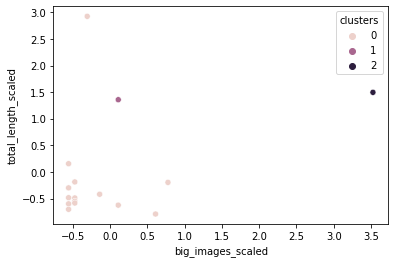

In [15]:
ana.visualizeCluster(df_scaled_clustered, "big_images_scaled", "total_length_scaled")

# Testing stuff

In [9]:
with open("CorpusData/www.zentralratderjuden.de.html", "r", encoding="utf-8") as f:
    doc = f.read()

In [10]:
soup = BeautifulSoup(doc, "html.parser")

In [13]:
carousels = soup.select(".carousel.slide")

In [14]:
carousels

[<div class="carousel carousel-fullscreen carousel-transition-fade slide hidden-print" data-interval="5000" data-ride="carousel" data-wrap="true" id="carousel-182" style="touch-action: pan-y; user-select: none; -webkit-user-drag: none; -webkit-tap-highlight-color: rgba(0, 0, 0, 0);"><div class="carousel-inner" role="listbox"><div class="item active carousel-item-type carousel-item-type-header" data-itemno="0" style="background-image: url('https://www.zentralratderjuden.de/fileadmin/user_upload/BannerOMA.png'); background-color: #ffffff;"><a draggable="false" href="https://www.zentralratderjuden.de/der-zentralrat/auszeichnungen/paul-spiegel-preis/"><div class="valign" style="color: #1c6a96;"><div class="vcontainer"><div class="container"><div class="text-resizer slideonce" style="margin-left: 0px;"><h1 class="text-left awesome h1car">Zentralrat der Juden</h1><h2 class="text-left awesome h2car">in Deutschland</h2></div></div></div></div></a></div><div class="item carousel-item-type carou

In [55]:
list1 = [1,2,3]
list2 = [3,4,5]

In [56]:
list1 + list2

[1, 2, 3, 3, 4, 5]